In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import os
from dv import AedatFile
import matplotlib.pyplot as plt
from matplotlib import animation 
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import DBSCAN
import seaborn as sns

In [2]:
FRAME = 1000

In [3]:
def read_aedat_file(path):
    with AedatFile(path) as f:
        events = np.hstack([packet for packet in f['events'].numpy()])
        timestamps, x, y, polarities = events['timestamp'], events['x'], events['y'], events['polarity']
        event_test = events[:FRAME]
        return event_test

In [4]:
test = read_aedat_file('./predata/newdata.aedat4')

In [5]:
sub=test['timestamp'][0]
print(sub)
for i in range(0,FRAME):
    test['timestamp'][i] -= sub

1631582148594939


In [6]:
temp=test['timestamp'][FRAME-1]
temp/=300
print(temp)

for i in range(0,FRAME):
    test['timestamp'][i] /= temp

18.953333333333333


<IPython.core.display.Javascript object>


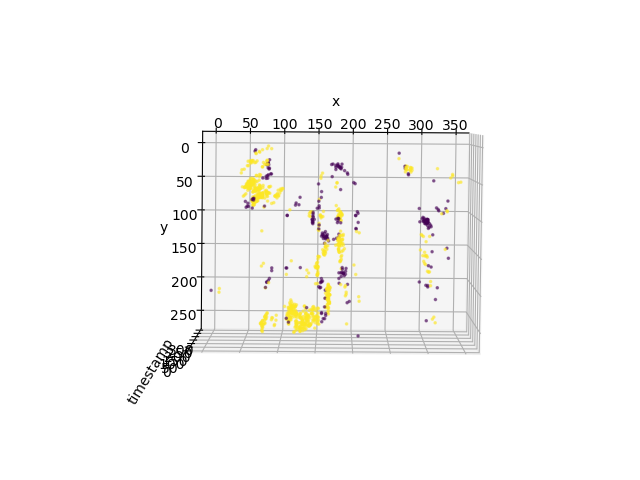

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(test['x'],test['y'],test['timestamp'],s=10,marker='.',c=test['polarity'],alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('timestamp')

plt.show()

In [8]:
df=pd.DataFrame(test)
df

,timestamp,x,y,polarity,_p1,_p2
0,0,207,256,0,0,0
1,0,132,241,1,0,0
2,1,304,141,0,0,0
3,1,65,74,1,0,0
4,1,114,240,1,0,0
...,...,...,...,...,...,...
995,299,55,54,1,0,0
996,299,161,130,0,0,0
997,299,120,239,1,0,0
998,299,151,167,1,0,0


In [9]:
feature = df[['x','y','timestamp','polarity']]
feature['timestamp'][0]

0

In [10]:
eps=30
min_samples=30

model = DBSCAN(eps=eps,min_samples=min_samples)

predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)


<IPython.core.display.Javascript object>


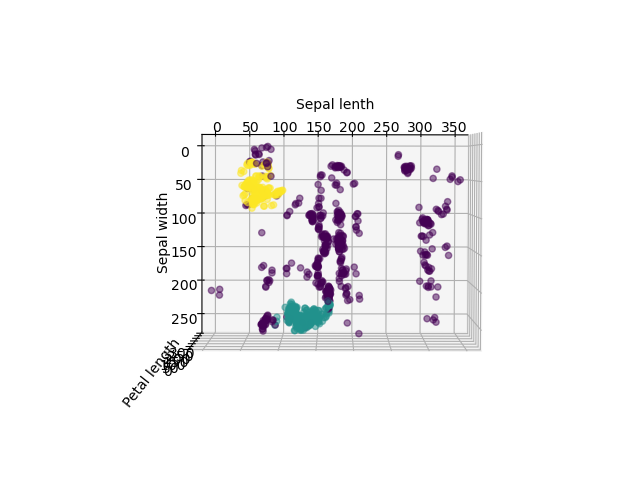

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(r['x'],r['y'],r['timestamp'],c=r['predict'],alpha=0.5)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()


In [12]:
pd.set_option('display.max_rows', None)
r['predict']

0     -1
1     -1
2     -1
3     -1
4     -1
5     -1
6     -1
7     -1
8     -1
9     -1
10    -1
11    -1
12    -1
13    -1
14    -1
15    -1
16    -1
17     0
18    -1
19    -1
20     0
21     0
22     0
23    -1
24    -1
25     0
26    -1
27    -1
28    -1
29    -1
30    -1
31    -1
32    -1
33    -1
34    -1
35    -1
36    -1
37     0
38    -1
39    -1
40    -1
41    -1
42    -1
43    -1
44    -1
45    -1
46    -1
47    -1
48    -1
49     0
50    -1
51     0
52    -1
53    -1
54    -1
55    -1
56     0
57    -1
58     0
59     1
60     0
61    -1
62    -1
63     0
64    -1
65     1
66     1
67     0
68     1
69     1
70     0
71    -1
72     1
73     1
74    -1
75    -1
76    -1
77    -1
78    -1
79    -1
80    -1
81    -1
82     1
83    -1
84    -1
85    -1
86    -1
87     0
88     1
89    -1
90     0
91    -1
92     0
93     0
94    -1
95    -1
96    -1
97     0
98     0
99    -1
100   -1
101   -1
102    0
103   -1
104    1
105   -1
106    0
107   -1
108    1
109    0
110    1
1